In [22]:
from IMPA.dataset.data_loader import CellDataLoader
from IMPA.solver import IMPAmodule
from omegaconf import OmegaConf
from tqdm import tqdm
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import os
import torch
from tqdm import tqdm
import pandas as pd
import seaborn as sns
from skimage import io, color, filters, measure
import pickle as pkl

import sys
sys.path.insert(0, "/home/icb/alessandro.palma/environment/IMPA/IMPA/experiments/measure_metrics")
from compute_metrics import *

In [23]:
def plot_results(result_df):
    result_df.loc[result_df['score_type']=='FID', 'score'] = 1 / result_df.loc[result_df['score_type']=='FID', 'score']
    result_df.loc[result_df['score_type']=='FID', 'score_type'] = u'FID\u207B\u00B9'
    
    plt.figure(figsize=(15,15))
    ax = sns.barplot(data=result_df,
                        x='score',
                        y='score_type',
                        hue='model',
                        palette='Paired',
                        orient='h')
        
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)
    
    # plt.xlabel('Metric value (\u2193)', fontsize=40)
    plt.xlabel('metric value (higher better)', fontsize=40)
    plt.ylabel('metric type', fontsize=40)
    plt.legend(loc=2, bbox_to_anchor=(1, 1), prop={'size': 28})
    plt.title('Evaluation metrics predictions on BBBC021', fontsize=40)
    plt.show()
    # plt.savefig('/lustre/groups/ml01/workspace/alessandro.palma/imCPA_official/experiments/general_experiments/1.benchmark_scores/plots/benchmark_scores_final.svg',
    #            dpi=300, bbox_inches='tight', format='svg')

In [24]:
def process_score(df, process_acc=True):
    df.loc[df['score_type']=='FID', 'score'] = 1 / df.loc[df['score_type']=='FID', 'score']
    df.loc[df['score_type']=='FID', 'score_type'] = u'FID\u207B\u00B9'
    if process_acc:
        df.loc[df['score_type']=='accuracy', 'score'] = 1 -  df.loc[df['score_type']=='accuracy', 'score']
    return df

In [36]:
results_impa = pd.read_pickle('/lustre/groups/ml01/workspace/alessandro.palma/imCPA_official/experiments/general_experiments/1.benchmark_scores/results/IMPA/bbbc021_try.pkl')
results_impa['dataset'] = 'IMPA'
results_stargan = pd.read_pickle('/lustre/groups/ml01/workspace/alessandro.palma/imCPA_official/experiments/general_experiments/1.benchmark_scores/results/starGANv1/bbbc021_try.pkl')
results_stargan['dataset'] = 'StarGANv1'
results_stargan['model'] = 'StarGANv1'
results_starganv2 = pd.read_pickle('/home/icb/alessandro.palma/environment/IMPA/IMPA/project_folder/results_revaluations/metrics_stargan_six2.pkl')
results_starganv2['dataset'] = 'StarGANv2'
results_starganv2['model'] = 'StarGANv2'
results_drit = pd.read_pickle('/lustre/groups/ml01/workspace/alessandro.palma/imCPA_official/experiments/general_experiments/1.benchmark_scores/results/DRIT++/bbbc021_try.pkl')
results_drit['dataset'] = 'DRIT++'
results_dmit = pd.read_pickle('/lustre/groups/ml01/workspace/alessandro.palma/imCPA_official/experiments/general_experiments/1.benchmark_scores/results/DMIT/bbbc021_try.pkl')
results_dmit['dataset'] = 'DMIT'
results_baseline = pd.read_pickle('/lustre/groups/ml01/workspace/alessandro.palma/imCPA_official/experiments/general_experiments/1.benchmark_scores/results/baseline/bbbc021_try.pkl')
results_baseline['dataset'] = 'baseline'

with open("/home/icb/alessandro.palma/environment/IMPA/IMPA/project_folder/results_revaluations/metrics_starganv2.pkl", "rb") as file:
    metrics_starGANv2 = pkl.load(file)

with open("/home/icb/alessandro.palma/environment/IMPA/IMPA/project_folder/results_revaluations/metrics_retrain.pkl", "rb") as file:
    metrics_IMPA = pkl.load(file)

with open("/home/icb/alessandro.palma/environment/IMPA/IMPA/experiments/measure_metrics/results_phendiff/results_bbbbc021.pkl", "rb") as file:
    metrics_phendiff = pkl.load(file)

with open("/home/icb/alessandro.palma/environment/IMPA/IMPA/experiments/measure_metrics/results_stytr/results_bbbbc021.pkl", "rb") as file:
    metrics_stytr = pkl.load(file)

In [37]:
results_impa = results_impa.replace('Density', 'density')
results_impa = results_impa.replace('Coverage', 'coverage')
results_impa = results_impa.replace('1-Accuracy', 'accuracy')
results_impa = process_score(results_impa, process_acc=True)

results_stargan = results_stargan.replace('Density', 'density')
results_stargan = results_stargan.replace('Coverage', 'coverage')
results_stargan = results_stargan.replace('1-Accuracy', 'accuracy')
results_stargan = process_score(results_stargan, process_acc=True)

results_starganv2 = results_starganv2.replace('Density', 'density')
results_starganv2 = results_starganv2.replace('Coverage', 'coverage')
results_starganv2 = results_starganv2.replace('Accuracy', 'accuracy')
results_starganv2 = process_score(results_starganv2, process_acc=False)

results_phendiff = metrics_phendiff.replace('Density', 'density')
results_phendiff = results_phendiff.replace('Coverage', 'coverage')
results_phendiff = results_phendiff.replace('Accuracy', 'accuracy')
results_phendiff = process_score(results_phendiff, process_acc=False)

results_stytr = metrics_stytr.replace('Density', 'density')
results_stytr = results_stytr.replace('Coverage', 'coverage')
results_stytr = results_stytr.replace('Accuracy', 'accuracy')
results_stytr = process_score(results_stytr, process_acc=False)

results_drit = results_drit.replace('Density', 'density')
results_drit = results_drit.replace('Coverage', 'coverage')
results_drit = results_drit.replace('1-Accuracy', 'accuracy')
results_drit = process_score(results_drit, process_acc=True)

results_dmit = results_dmit.replace('Density', 'density')
results_dmit = results_dmit.replace('Coverage', 'coverage')
results_dmit = results_dmit.replace('1-Accuracy', 'accuracy')
results_dmit = process_score(results_dmit, process_acc=True)

results_baseline = results_baseline.replace('Density', 'density')
results_baseline = results_baseline.replace('Coverage', 'coverage')
results_baseline = results_baseline.replace('1-Accuracy', 'accuracy')
results_baseline = process_score(results_baseline, process_acc=True)

In [46]:
all_results = pd.concat([results_stytr,
                         results_phendiff,
                         results_baseline, 
                         results_drit, 
                         results_dmit, 
                         results_stargan, 
                         results_starganv2,
                         results_impa], axis=0)

In [47]:
grouping = all_results.groupby('model', as_index=False).mean()
grouping['score_type']='average'
grouping['mol'] = 'all'
grouping['dataset'] = grouping['model']

grouping

/tmp/ipykernel_2340870/4060040875.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouping = all_results.groupby('model', as_index=False).mean()


,model,score,run,score_type,mol,dataset
0,DMIT,0.853879,4.5,average,all,DMIT
1,DRIT++,0.700357,4.5,average,all,DRIT++
2,IMPA,1.131077,4.5,average,all,IMPA
3,PhenDiff,0.548814,0.0,average,all,PhenDiff
4,StarGANv1,0.954527,4.5,average,all,StarGANv1
5,StarGANv2,0.993318,1.0,average,all,StarGANv2
6,StyTR,0.514581,1.0,average,all,StyTR
7,baseline,0.669083,4.5,average,all,baseline


In [48]:
all_results=pd.concat([all_results, grouping])
all_results

,score,score_type,run,mol,model,dataset
0,1.381989,FID⁻¹,0.0,AZ138,StyTR,NaN
1,1.009731,density,0.0,AZ138,StyTR,NaN
2,0.376154,coverage,0.0,AZ138,StyTR,NaN
3,0.000000,accuracy,0.0,AZ138,StyTR,NaN
4,0.951952,FID⁻¹,0.0,AZ258,StyTR,NaN
...,...,...,...,...,...,...
3,0.548814,average,0.0,all,PhenDiff,PhenDiff
4,0.954527,average,4.5,all,StarGANv1,StarGANv1
5,0.993318,average,1.0,all,StarGANv2,StarGANv2
6,0.514581,average,1.0,all,StyTR,StyTR


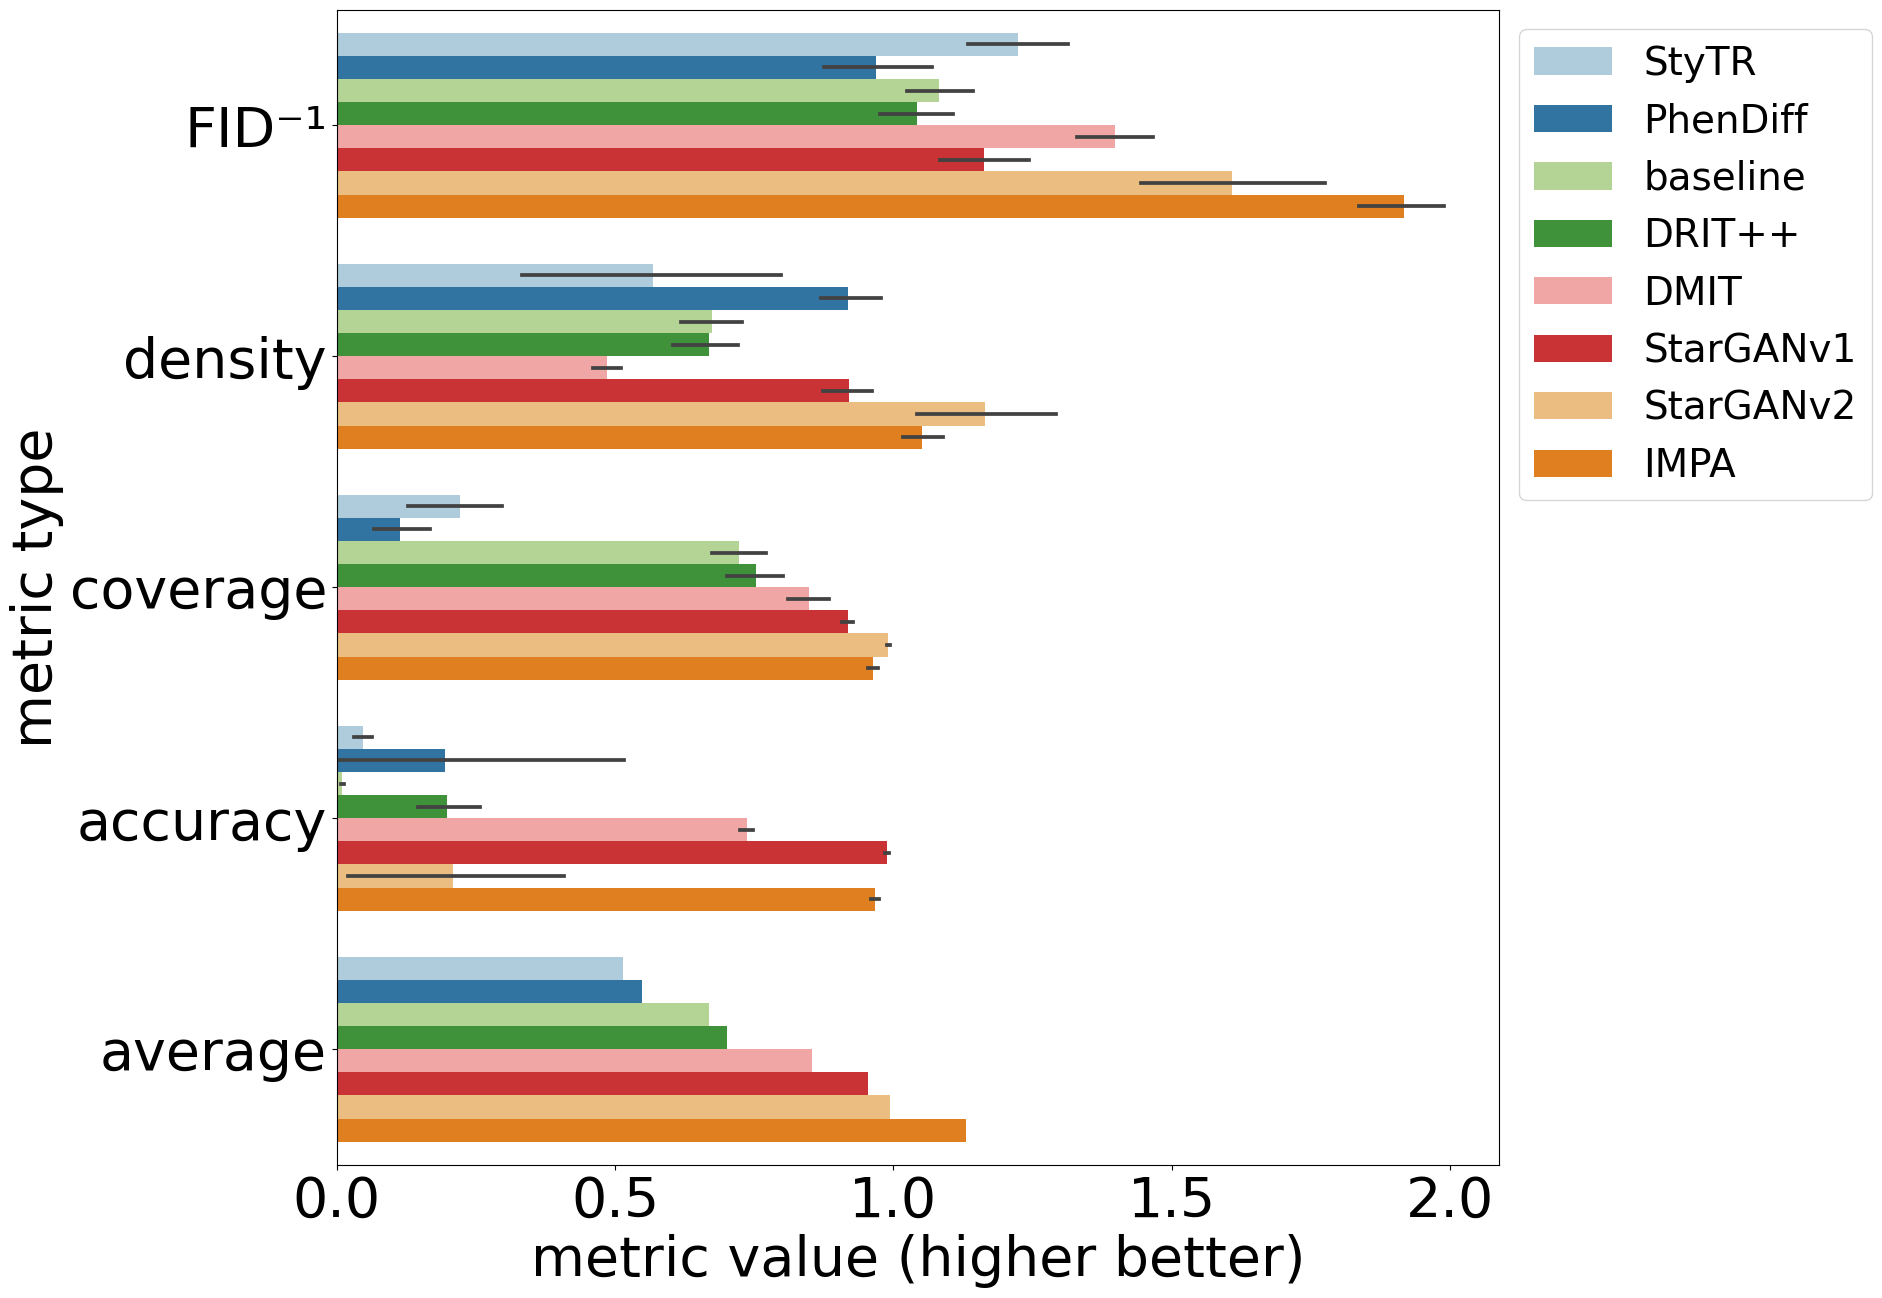

In [49]:
to_plot = ['FID\u207B\u00B9', 'density', 'coverage', 'accuracy', 'average']
# all_results = all_results.replace('baseline', 'Baseline')

plt.figure(figsize=(15,15))
ax = sns.barplot(data=all_results.loc[all_results.score_type.isin(to_plot)],
                x='score',
                y='score_type',
                hue='model',
                palette='Paired',
                orient='h')

plt.xticks([0, 0.5, 1, 1.5, 2], fontsize=40)
plt.yticks(fontsize=40)

# plt.xlabel('Metric value (\u2193)', fontsize=40)
plt.xlabel('metric value (higher better)', fontsize=40)
plt.ylabel('metric type', fontsize=40)
plt.legend(loc=2, bbox_to_anchor=(1, 1), prop={'size': 28})
plt.title('', fontsize=40)
plt.savefig('benchmark_scores_final.svg',
           dpi=300, bbox_inches='tight', format='svg')
plt.show()